<a href="https://colab.research.google.com/github/SebasAlvarez2004/Test-bench-for-solid-combustion-rockets/blob/main/Banco_de_prueba_para_cohetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Medidas de Tendencia Central:
Media Temperatura: 624.6551428571429 K
Media Fuerza de Empuje: 64.00733944954128 N
Media Flujo Masico: 7.198070255512899 kg/s

Medidas de Dispersión:
Desviación Temperatura: 201.9400521466913 K
Desviación Fuerza de Empuje: 51.17924464084003 N
Desviación Flujo Masico: 3.2229839063605548 kg/s

Datos:
     thrust  temperatura  Flujo Masico (kg/s)
0    277.42       354.15             3.755141
1    277.08       353.15             3.747537
2    276.80       353.40             3.746969
3    285.99       353.40             3.808662
4   2795.99       353.15            11.904501
5    306.37       352.65             3.937847
6    326.27       452.65             4.603982
7    476.23       551.90             6.141894
8    526.61       652.15             7.020727
9    578.94       751.65             7.902935
10   677.61       758.40             8.588214
11   698.08       747.15             8.652075
12   778.47       761.90             9.226430
13   780.51       850.90  

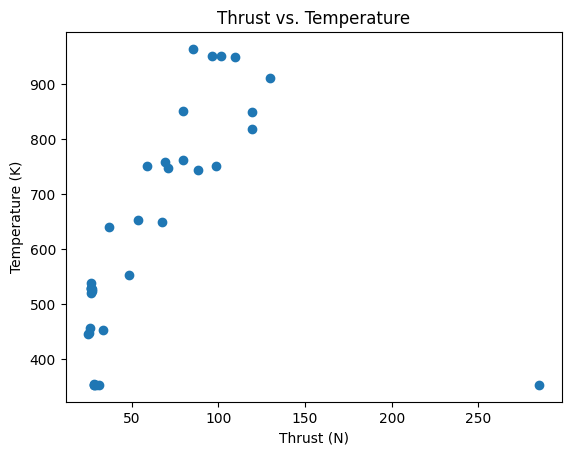

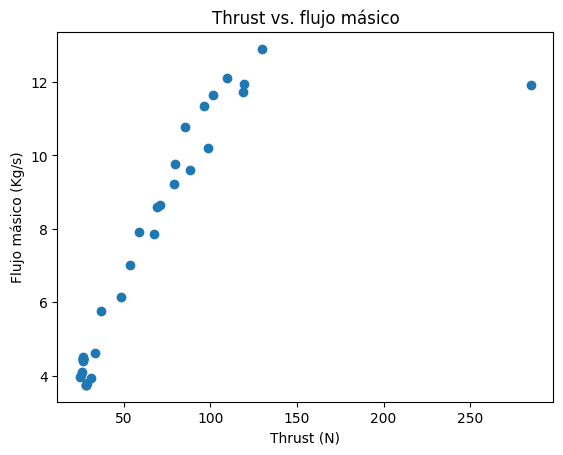

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Pandas import data CSV
#Crear dataframe
data = pd.read_csv('/DataCuete2.csv', delimiter=';')
data.head()
fuerza_empuje = data['thrust']/9.81

# Cálculo del flujo másico
def calcular_flujo_masico(temperatura, fuerza_empuje):
    R = 287.05  # J/(kg·K)
    # Cálculo de la velocidad efectiva de escape (Isp)
    ve = np.sqrt((2 * fuerza_empuje) / R / temperatura)
    # Cálculo del flujo másico
    flujo_masico = fuerza_empuje / (ve*1000) #En Kg/s
    #print(flujo_masico)
    return flujo_masico

# Calcular el flujo másico para cada conjunto de datos
data['Flujo Masico (kg/s)'] = data.apply(lambda row: calcular_flujo_masico(row['temperatura'], row['thrust']), axis=1)

# Medidas de tendencia central
media_temperatura = data['temperatura'].mean()
media_fuerza_empuje = (data['thrust']/9.81).mean()
media_flujo_masico = data['Flujo Masico (kg/s)'].mean()

# Medidas de dispersión
desviacion_temperatura = data['temperatura'].std()
desviacion_fuerza_empuje = fuerza_empuje.std()
desviacion_flujo_masico = data['Flujo Masico (kg/s)'].std()

# Mostrar los resultados
print("Medidas de Tendencia Central:")
print(f"Media Temperatura: {media_temperatura} K")
print(f"Media Fuerza de Empuje: {media_fuerza_empuje} N")
print(f"Media Flujo Masico: {media_flujo_masico} kg/s")

print("\nMedidas de Dispersión:")
print(f"Desviación Temperatura: {desviacion_temperatura} K")
print(f"Desviación Fuerza de Empuje: {desviacion_fuerza_empuje} N")
print(f"Desviación Flujo Masico: {desviacion_flujo_masico} kg/s")

# Visualizar los datos
print("\nDatos:")
print(data)

#graficas
plt.scatter(fuerza_empuje, data['temperatura'])
plt.xlabel('Thrust (N)')
plt.ylabel('Temperature (K)')
plt.title('Thrust vs. Temperature')
plt.show()
plt.scatter(fuerza_empuje, data['Flujo Masico (kg/s)'])
plt.xlabel('Thrust (N)')
plt.ylabel('Flujo másico (Kg/s)')
plt.title('Thrust vs. flujo másico')
plt.show()